In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


Data Cleaning

In [3]:
files = ['data/hyderabad_first_type_000.csv', 'data/hyderabad_first_type_100.csv', 'data/hyderabad_first_type_200.csv','data/hyderabad_first_type_300.csv']
df_list = [pd.read_csv(f) for f in files]


In [4]:
df = pd.concat(df_list, ignore_index=True)

In [5]:
df.shape

(9866, 13)

In [6]:
df.isnull().sum()

Price                0
Carpet Area       8036
Bedrooms            32
Builder           9590
Paid User            0
Locality           665
Property Type        0
User Type            0
Prime Location       0
Agent                1
Link                 0
Prop ID              0
Other                0
dtype: int64

In [7]:
df['Locality'].dropna(inplace=True)


In [8]:
df.sample(10)

,Price,Carpet Area,Bedrooms,Builder,Paid User,Locality,Property Type,User Type,Prime Location,Agent,Link,Prop ID,Other
3809,1.04 Cr,NaN,1,NaN,N,"Apurupa Colony, Suraram",Apartment,Owner,Y,Narsimha,https://www.magicbricks.com/propertyDetails/1-...,domcache_srp_48559239,***super area*460 sqft****status*Ready to Move...
9439,92 Lac,NaN,3,NaN,N,Aminpur,Residential House,Owner,Y,Sameer,https://www.magicbricks.com/propertyDetails/3-...,domcache_srp_55149775,***super area*135 sqyrd****status*Ready to Mov...
2775,60 Lac,NaN,2,NaN,N,"Sai Baba Nagar Colony, Secunderabad",Apartment,Owner,Y,chakrapani,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_46414221,***super area*1050 sqft****status*Ready to Mov...
5408,89.4 Lac,N,2,NaN,N,"Kokapet, Outer Ring Road",Apartment,Owner,Y,Reddy,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55939229,***super area*1345 sqft****status**\t\t\t\t\t\...
140,75.3 Lac,NaN,3,NaN,Y,"Champapet, Koti",Apartment,Owner,Y,leela kumar,https://www.magicbricks.com/propertyDetails/3-...,domcache_srp_55662917,***carpet area*1350 sqft****status*Ready to Mo...
2000,1.25 Cr,NaN,3,NaN,N,"Tellapur, Outer Ring Road",Apartment,Owner,Y,Sudheer,https://www.magicbricks.com/propertyDetails/3-...,domcache_srp_56339983,***carpet area*2339 sqft****status*Ready to Mo...
2454,75 Lac,N,2,NaN,N,NaN,Apartment,Owner,Y,Nousheen Sultana,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_52979933,***carpet area*1240 sqft****status**\t\t\t\t\t...
1405,53 Lac,NaN,3,NaN,N,Bachupally,Apartment,Owner,Y,Kranthi Koganti,https://www.magicbricks.com/propertyDetails/3-...,domcache_srp_56370065,***carpet area*1250 sqft****status*Ready to Mo...
5268,38 Lac,NaN,2,NaN,N,Nagaram,Apartment,Owner,Y,sai,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55388769,***carpet area*1200 sqft****status*Ready to Mo...
8500,1.40 Cr,NaN,4,NaN,N,"Mayuri Nagar, Miyapur",Residential House,Owner,Y,Joseph reddy,https://www.magicbricks.com/propertyDetails/4-...,domcache_srp_54080677,***carpet area*132 sqft****status*Ready to Mov...


In [9]:
df.drop(columns=['Carpet Area','Agent','Builder','Paid User','User Type','Prime Location','Prop ID'], inplace=True)

In [10]:
df.head()

,Price,Bedrooms,Locality,Property Type,Link,Other
0,49.3 Lac,2,Adibatla,Apartment,https://www.magicbricks.com/propertyDetails/2-...,***super area*1285 sqft*****transaction*New Pr...
1,79.9 Lac,2,"Manikonda, Outer Ring Road",Apartment,https://www.magicbricks.com/propertyDetails/2-...,***super area*1268 sqft****status*Ready to Mov...
2,86.3 Lac,2,Hitech City,Apartment,https://www.magicbricks.com/propertyDetails/2-...,***super area*1150 sqft****status*Ready to Mov...
3,40.9 Lac,2,Aminpur,Apartment,https://www.magicbricks.com/propertyDetails/2-...,***super area*918 sqft****status**\t\t\t\t\t\t...
4,1.35 Cr,3,Shaikpet,Apartment,https://www.magicbricks.com/propertyDetails/3-...,***super area*1895 sqft****status**\t\t\t\t\t\...


In [11]:
df['Other'][0]

'***super area*1285\xa0sqft*****transaction*New Property***furnishing*Unfurnished***car parking*1 Covered***bathroom*2**'

In [12]:
df['Link'][0]

'https://www.magicbricks.com/propertyDetails/2-BHK-1285-Sq-ft-Multistorey-Apartment-FOR-Sale-Adibatla-in-Hyderabad&id=4d423534333634343537?sem=Y&semsrc=CPLADS_1_PDP_Existing_Web&slot=1'

In [13]:
df.drop(columns=['Other'], inplace=True)

In [14]:
pattern = r'(\d+)-Sq-ft'
df['Sqft'] = df['Link'].str.extract(pattern)


In [15]:
df.sample()

,Price,Bedrooms,Locality,Property Type,Link,Sqft
9854,55 Lac,2,"Neknampur, Manikonda, Outer Ring Road",Apartment,https://www.magicbricks.com/propertyDetails/2-...,1200


In [16]:
df.drop(columns=['Link'], inplace=True)

In [17]:
len(df['Locality'].unique())

1039

In [18]:
(df['Locality'].value_counts()>10).sum()

155

In [19]:
(df['Price'].value_counts()==1).sum()

236

In [20]:
pattern = r'(\d+)'
df['Price'] = df['Price'].str.extract(pattern)
df.head()


,Price,Bedrooms,Locality,Property Type,Sqft
0,49,2,Adibatla,Apartment,1285
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268
2,86,2,Hitech City,Apartment,1150
3,40,2,Aminpur,Apartment,918
4,1,3,Shaikpet,Apartment,1895


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866 entries, 0 to 9865
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          9866 non-null   object
 1   Bedrooms       9834 non-null   object
 2   Locality       9201 non-null   object
 3   Property Type  9866 non-null   object
 4   Sqft           8991 non-null   object
dtypes: object(5)
memory usage: 385.5+ KB


In [22]:
df['Bedrooms'][2193]

'> 10'

In [23]:
df['Price']=pd.to_numeric(df['Price'], errors= 'coerce')
df['Sqft']=pd.to_numeric(df['Sqft'],errors= 'coerce')



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866 entries, 0 to 9865
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          9866 non-null   int64  
 1   Bedrooms       9834 non-null   object 
 2   Locality       9201 non-null   object 
 3   Property Type  9866 non-null   object 
 4   Sqft           8991 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 385.5+ KB


In [25]:
df.sample(5)

,Price,Bedrooms,Locality,Property Type,Sqft
5226,22,2,Shamirpet,Apartment,1040.0
4134,35,2,Upperpally,Apartment,930.0
1283,59,2,"Madinaguda, Hafeezpet, NH 9",Apartment,1025.0
5134,60,2,"Erragadda, NH 9",Apartment,950.0
559,65,2,"Chaitanyapuri, Kothapet",Apartment,985.0


In [26]:
df.loc[df['Price'] == 1, 'Price'] = 100


In [27]:
(df['Price'].value_counts()==1).sum()

0

In [28]:
(df['Price']==100).sum()

1707

In [29]:
df.head()

,Price,Bedrooms,Locality,Property Type,Sqft
0,49,2,Adibatla,Apartment,1285.0
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268.0
2,86,2,Hitech City,Apartment,1150.0
3,40,2,Aminpur,Apartment,918.0
4,100,3,Shaikpet,Apartment,1895.0


In [30]:
df.isnull().sum()

Price              0
Bedrooms          32
Locality         665
Property Type      0
Sqft             875
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

Price            0
Bedrooms         0
Locality         0
Property Type    0
Sqft             0
dtype: int64

In [33]:
df.shape

(8363, 5)

In [34]:
df['Locality'].value_counts()

Locality
Miyapur, NH  9                         263
Manikonda, Outer Ring Road             228
Bachupally                             219
Nizampet                               207
Kondapur                               190
                                      ... 
Venkataramana Colony, Secunderabad       1
Saraswathi Colony, Secunderabad          1
Muthawalliguda                           1
Kurmaguda, Srisailam Highway             1
Beerappagadda, Secunderabad, NH 2 2      1
Name: count, Length: 966, dtype: int64

In [35]:
len(df['Locality'].unique())

966

In [36]:
p = df[df['Locality'].isin(df['Locality'].value_counts()[df['Locality'].value_counts() > 50].index)]


In [37]:
p

,Price,Bedrooms,Locality,Property Type,Sqft
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268.0
3,40,2,Aminpur,Apartment,918.0
6,77,2,"LB Nagar, NH 9",Apartment,1250.0
7,52,2,"Tellapur, Outer Ring Road",Apartment,1010.0
8,72,2,Kompally,Apartment,1249.0
...,...,...,...,...,...
9834,54,2,"Manikonda, Outer Ring Road",Builder Floor Apartment,1250.0
9847,33,2,Bachupally,Apartment,1055.0
9857,40,2,Nizampet,Apartment,1115.0
9860,52,3,"Manikonda, Outer Ring Road",Apartment,1125.0


In [38]:
(df['Locality'].value_counts()>50).sum()

36

In [39]:
len(p['Locality'].unique())

36

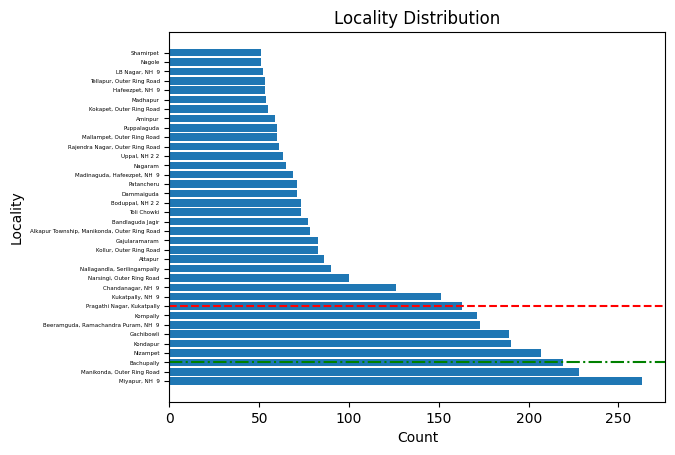

In [40]:
locality_counts = df['Locality'].value_counts()
filtered_counts = locality_counts[locality_counts > 50]
new_loc = df[df['Locality'].isin(filtered_counts.index)]
plt.barh(new_loc['Locality'].value_counts().index,new_loc['Locality'].value_counts().values)
plt.yticks(fontsize=4)

plt.xlabel('Count')
plt.ylabel('Locality')
plt.title('Locality Distribution')
mean_value = int(locality_counts.mean())
median_value = int(locality_counts.median())

plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean')
plt.axhline(y=median_value, color='green', linestyle='-.', label='Median')

plt.show()


In [41]:
df.head()

,Price,Bedrooms,Locality,Property Type,Sqft
0,49,2,Adibatla,Apartment,1285.0
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268.0
2,86,2,Hitech City,Apartment,1150.0
3,40,2,Aminpur,Apartment,918.0
4,100,3,Shaikpet,Apartment,1895.0


In [42]:
#locality_counts.median()


In [43]:
df.sample()

,Price,Bedrooms,Locality,Property Type,Sqft
4080,75,2,Chanda Nagar,Apartment,1000.0


In [44]:
df = df[df['Locality'].isin(p['Locality'])]
df

,Price,Bedrooms,Locality,Property Type,Sqft
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268.0
3,40,2,Aminpur,Apartment,918.0
6,77,2,"LB Nagar, NH 9",Apartment,1250.0
7,52,2,"Tellapur, Outer Ring Road",Apartment,1010.0
8,72,2,Kompally,Apartment,1249.0
...,...,...,...,...,...
9834,54,2,"Manikonda, Outer Ring Road",Builder Floor Apartment,1250.0
9847,33,2,Bachupally,Apartment,1055.0
9857,40,2,Nizampet,Apartment,1115.0
9860,52,3,"Manikonda, Outer Ring Road",Apartment,1125.0


In [45]:
df.head()

,Price,Bedrooms,Locality,Property Type,Sqft
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268.0
3,40,2,Aminpur,Apartment,918.0
6,77,2,"LB Nagar, NH 9",Apartment,1250.0
7,52,2,"Tellapur, Outer Ring Road",Apartment,1010.0
8,72,2,Kompally,Apartment,1249.0


In [46]:
len(df['Locality'].unique())

36

In [49]:
locations = df['Locality'].unique()
print(locations)

['Manikonda, Outer Ring Road' 'Aminpur' 'LB Nagar, NH  9'
 'Tellapur, Outer Ring Road' 'Kompally' 'Bachupally' 'Miyapur, NH  9'
 'Kokapet, Outer Ring Road' 'Alkapur Township, Manikonda, Outer Ring Road'
 'Uppal, NH 2 2' 'Chandanagar, NH  9' 'Pragathi Nagar, Kukatpally'
 'Toli Chowki' 'Nagole' 'Shamirpet' 'Nizampet' 'Gachibowli'
 'Kollur, Outer Ring Road' 'Puppalaguda' 'Madinaguda, Hafeezpet, NH  9'
 'Nallagandla, Serilingampally' 'Narsingi, Outer Ring Road'
 'Kukatpally, NH  9' 'Patancheru' 'Nagaram'
 'Beeramguda, Ramachandra Puram, NH  9' 'Rajendra Nagar, Outer Ring Road'
 'Kondapur' 'Dammaiguda' 'Mallampet, Outer Ring Road' 'Gajularamaram'
 'Bandlaguda Jagir' 'Hafeezpet, NH  9' 'Madhapur' 'Boduppal, NH 2 2'
 'Attapur']


Data Preprocessing

In [50]:
l = sklearn.preprocessing.LabelEncoder()
encoded_locations= l.fit_transform(df['Locality'])
df['Locality']= encoded_locations
print(encoded_locations)

[21  1 17 ... 27 21  0]


In [53]:
original_locations = l.classes_
print(original_locations)

['Alkapur Township, Manikonda, Outer Ring Road' 'Aminpur' 'Attapur'
 'Bachupally' 'Bandlaguda Jagir' 'Beeramguda, Ramachandra Puram, NH  9'
 'Boduppal, NH 2 2' 'Chandanagar, NH  9' 'Dammaiguda' 'Gachibowli'
 'Gajularamaram' 'Hafeezpet, NH  9' 'Kokapet, Outer Ring Road'
 'Kollur, Outer Ring Road' 'Kompally' 'Kondapur' 'Kukatpally, NH  9'
 'LB Nagar, NH  9' 'Madhapur' 'Madinaguda, Hafeezpet, NH  9'
 'Mallampet, Outer Ring Road' 'Manikonda, Outer Ring Road'
 'Miyapur, NH  9' 'Nagaram' 'Nagole' 'Nallagandla, Serilingampally'
 'Narsingi, Outer Ring Road' 'Nizampet' 'Patancheru'
 'Pragathi Nagar, Kukatpally' 'Puppalaguda'
 'Rajendra Nagar, Outer Ring Road' 'Shamirpet' 'Tellapur, Outer Ring Road'
 'Toli Chowki' 'Uppal, NH 2 2']


In [56]:
encoding_dict = dict(zip(original_locations, range(len(original_locations))))
print(encoding_dict)

{'Alkapur Township, Manikonda, Outer Ring Road': 0, 'Aminpur': 1, 'Attapur': 2, 'Bachupally': 3, 'Bandlaguda Jagir': 4, 'Beeramguda, Ramachandra Puram, NH  9': 5, 'Boduppal, NH 2 2': 6, 'Chandanagar, NH  9': 7, 'Dammaiguda': 8, 'Gachibowli': 9, 'Gajularamaram': 10, 'Hafeezpet, NH  9': 11, 'Kokapet, Outer Ring Road': 12, 'Kollur, Outer Ring Road': 13, 'Kompally': 14, 'Kondapur': 15, 'Kukatpally, NH  9': 16, 'LB Nagar, NH  9': 17, 'Madhapur': 18, 'Madinaguda, Hafeezpet, NH  9': 19, 'Mallampet, Outer Ring Road': 20, 'Manikonda, Outer Ring Road': 21, 'Miyapur, NH  9': 22, 'Nagaram': 23, 'Nagole': 24, 'Nallagandla, Serilingampally': 25, 'Narsingi, Outer Ring Road': 26, 'Nizampet': 27, 'Patancheru': 28, 'Pragathi Nagar, Kukatpally': 29, 'Puppalaguda': 30, 'Rajendra Nagar, Outer Ring Road': 31, 'Shamirpet': 32, 'Tellapur, Outer Ring Road': 33, 'Toli Chowki': 34, 'Uppal, NH 2 2': 35}


In [54]:
df.head(4)

,Price,Bedrooms,Locality,Property Type,Sqft
1,79,2,21,Apartment,1268.0
3,40,2,1,Apartment,918.0
6,77,2,17,Apartment,1250.0
7,52,2,33,Apartment,1010.0


In [ ]:
df['Property Type'].unique()

array(['Apartment', 'Villa', 'Residential House',
       'Builder Floor Apartment', 'Penthouse'], dtype=object)

In [ ]:
df['Bedrooms'].unique()

array(['2', '3', '4', '1', '6', '5', '> 10', '7'], dtype=object)

In [ ]:
(df['Bedrooms']=='> 10').sum()

1

In [ ]:
df.drop(df[df['Bedrooms'] == '> 10'].index, inplace=True)


In [ ]:
(df['Bedrooms']=='> 10').sum()

0

In [ ]:
len(df['Locality'].unique())


36

In [ ]:
df.sample(5)

,Price,Bedrooms,Locality,Property Type,Sqft
2056,100,3,12,Apartment,1769.0
6736,46,2,14,Apartment,842.0
4048,18,2,32,Apartment,1050.0
8556,35,2,5,Apartment,1300.0
7194,60,2,2,Apartment,1052.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Price','Bedrooms','Property Type'], axis=1), df['Price'], test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,Locality,Sqft
9210,19,1340.0
8988,29,1080.0
1336,3,1449.0
9691,5,900.0
5523,7,1600.0


Random Forest

In [ ]:
mr = RandomForestRegressor(max_features=1,max_depth=11, criterion='squared_error',n_estimators=60, random_state=0)
mr.fit(x_train, y_train)

RandomForestRegressor(max_depth=11, max_features=1, n_estimators=60,
                      random_state=0)

In [ ]:
y_pred = mr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
r2_score(y_test, y_pred)

0.694232522890001

In [ ]:
mean_squared_error(y_test, y_pred)

175.23174431022628

Saving the model

In [ ]:
import pickle
saved_model = pickle.dumps(mr)
with open('forest_model.pkl', 'wb') as file:
    pickle.dump(mr, file)
file.close()